# Bulldozers' sale price EDA

## Summary

In this notebook, we are going to perform an Explorative Data Analysis over the dataset: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

### Problem: which feature contributes most to the bulldozer's final price?

We will create visualizations to confront features and try to find insights from the dataset.

### Data

The dataset was collected by Kaggle: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

The dataset is provided with a data dictionary: https://docs.google.com/spreadsheets/d/e/2PACX-1vTbZNhQwWedzw6y1VFqhsvfJo3rtyzen62a6G0rnwufZo9FAtbiO3qO4xbAGmANWQT9jDUg6N_E_knw/pubhtml

### Steps

undefined. Import necessary libraries

undefined. Parse date and time column

undefined. Sentiment analysis of features

undefined. Visualizations

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [6]:
data = pd.read_csv("TrainAndValid.csv", parse_dates = ["saledate"], low_memory = False)

## Parsing Date and Time column

We use pandas DateTime methods to add columns to dataframe to extract and make usable date variables.

In [7]:
# Defining a function to parse date and time

def DateTime(df):
    """
    Create columns containing year, month, day, day of month, day of the year and drop saledate column.
    """
    data["SaleYear"] = data.saledate.dt.year
    data["SaleMonth"] = data.saledate.dt.month
    data["SaleDay"] = data.saledate.dt.day
    data["DayofWeek"] = data.saledate.dt.dayofweek
    data["DayofYear"] = data.saledate.dt.dayofyear

    # Drop saledate column
    data.drop("saledate", axis = 1, inplace = True)

In [8]:
DateTime(data)

I am checking dataset info.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [10]:
#data.sort_values(by = ["SaleYear"], ascending = True, inplace = True)

In [12]:
# Saving the processed dataset
data.to_csv("bulldozer-data-date-parsing.csv", index = False)

## Visualization

We have confronted some features with exploring insights in the dataset

### Univariate Analysis

Year we want to examinate some particular features and their distribution.

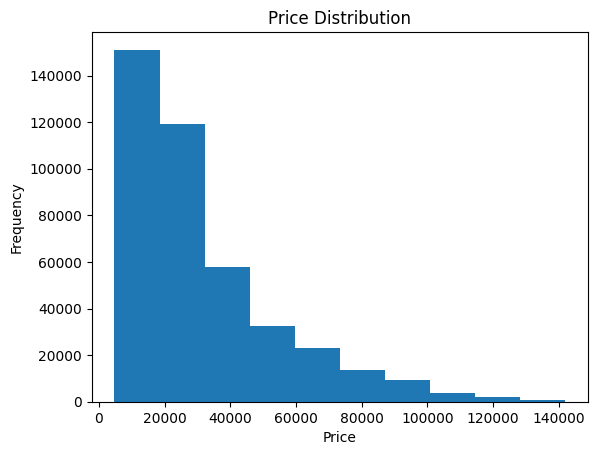

In [8]:
# Inspecting the distribution of the prices

data["SalePrice"].plot.hist()
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

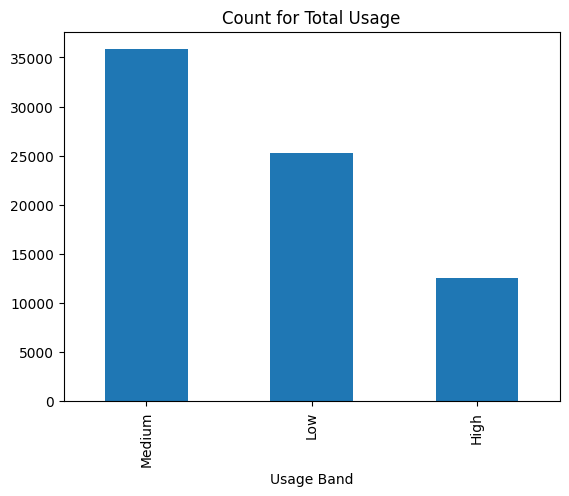

In [18]:
a = data["UsageBand"].value_counts().plot(kind = "bar")
plt.title("Count for Total Usage")
plt.xlabel("Usage Band")
plt.show()

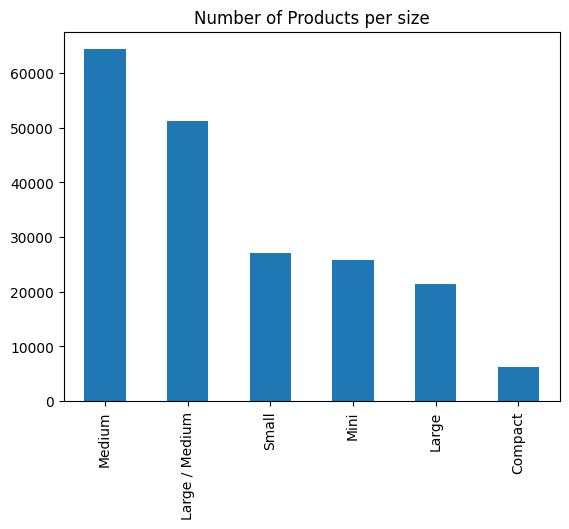

In [14]:
# Checking the number of products per product size
data.ProductSize.value_counts().plot(kind = "bar")
plt.title("Number of Products per size")
plt.show()

### Multivariate Analysis

We want to check the correlation between features and the final price. 

Text(44.32275173611109, 0.5, 'Sale Price')

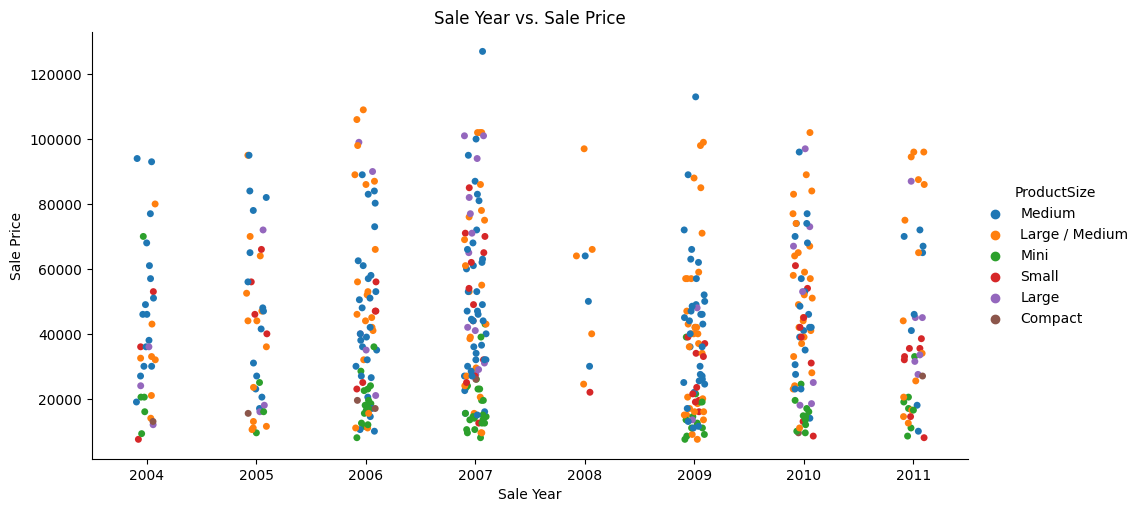

In [9]:
# Checking the sale year vs. the final price
sns.catplot(data[:1000], x = "SaleYear", y = "SalePrice", aspect = 2, hue = "ProductSize")
plt.title("Sale Year vs. Sale Price")
plt.xlabel("Sale Year")
plt.ylabel("Sale Price")

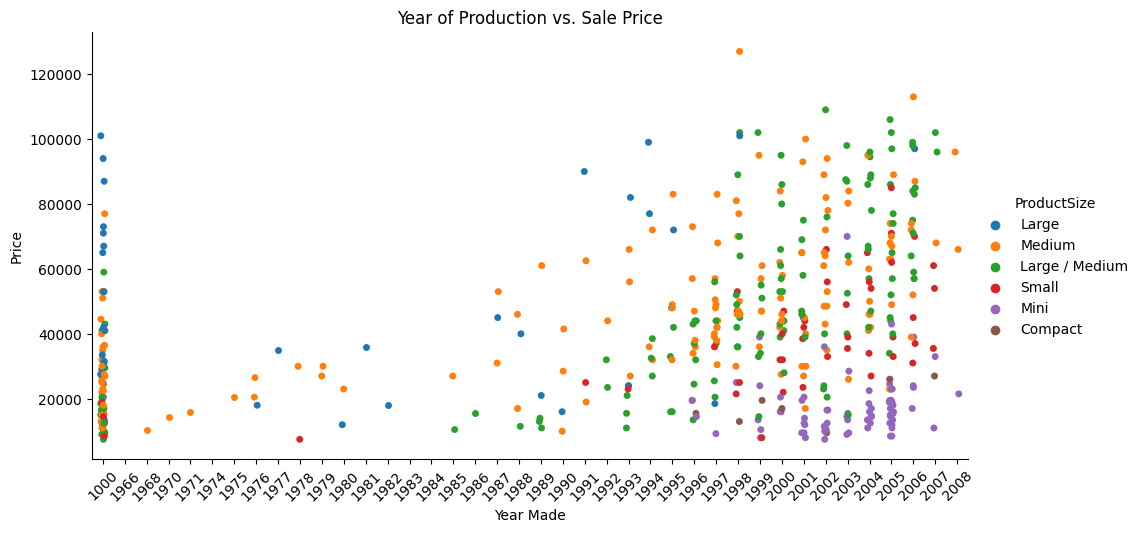

In [10]:
# Checking year of prodiction vs. final price

sns.catplot(data[:1000], x = "YearMade", y = "SalePrice",aspect = 2, hue = "ProductSize")
plt.xticks(rotation = 45)
plt.title("Year of Production vs. Sale Price")
plt.xlabel("Year Made")
plt.ylabel("Price")
plt.show()

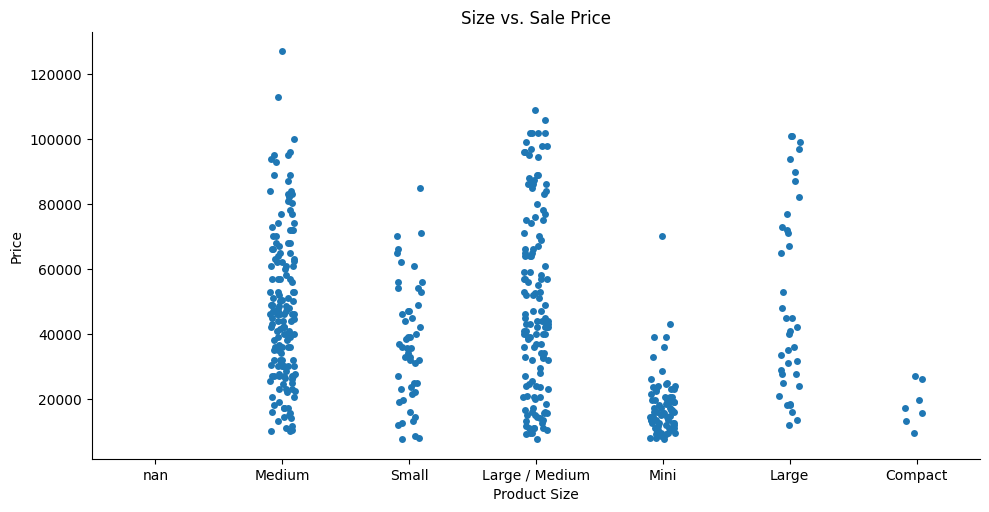

In [12]:
# Checking size vs. Sale Price

sns.catplot(data[:1000], x = "ProductSize", y = "SalePrice", aspect = 2)
plt.title("Size vs. Sale Price")
plt.xlabel("Product Size")
plt.ylabel("Price")
plt.show()

<AxesSubplot: xlabel='UsageBand', ylabel='SalePrice'>

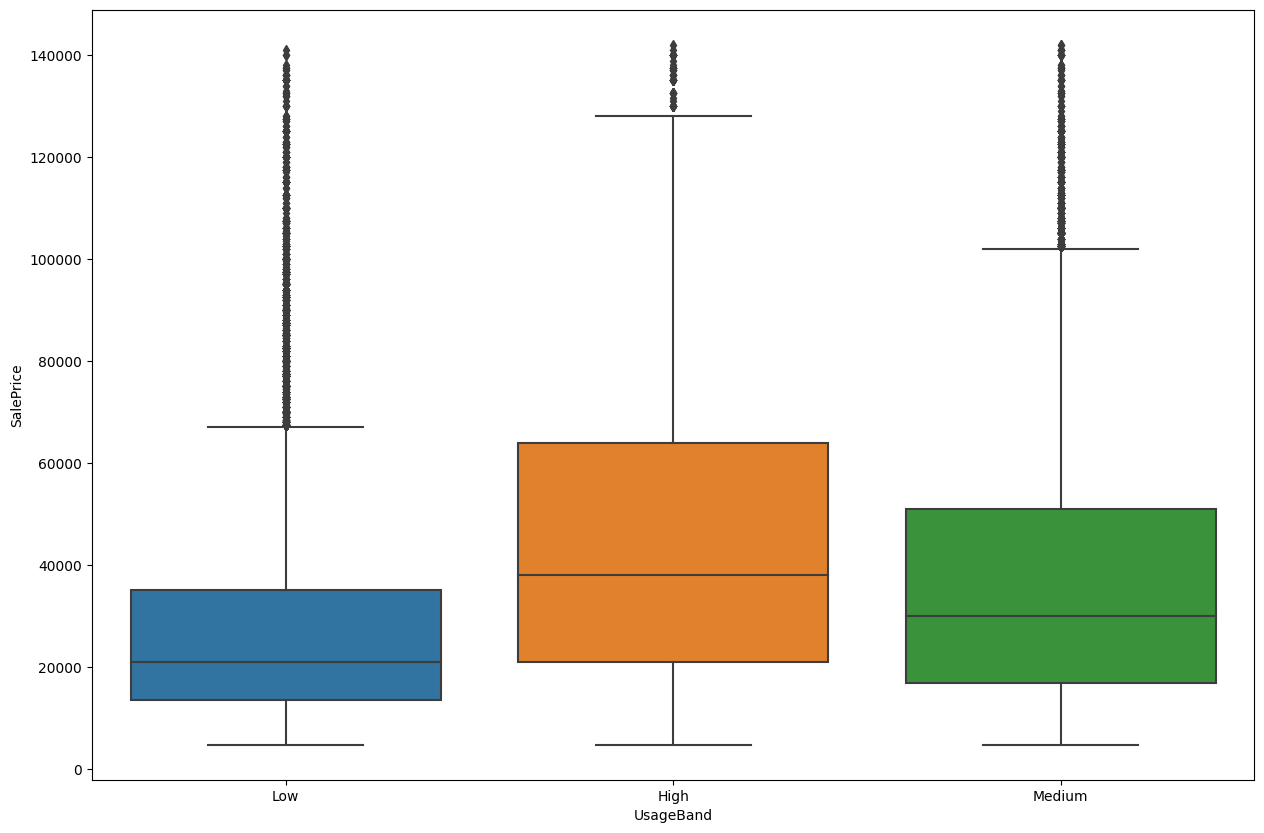

In [13]:
# Checking sale price vs. Usage Band

plt.figure(figsize = (15, 10))
sns.boxplot(data, x = "UsageBand", y = "SalePrice")


### Price vs. year for various Product size and usage band

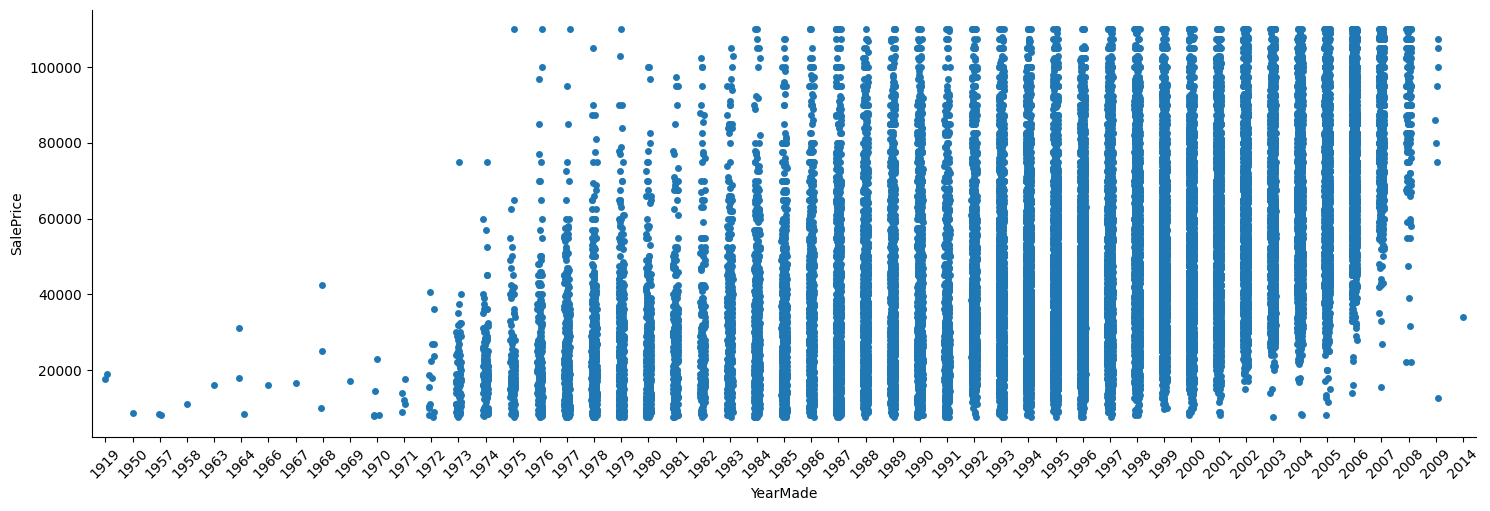

In [14]:
d = data[data.ProductSize == "Large / Medium"]
sns.catplot(d[d.YearMade >= 1900], x = "YearMade", y = "SalePrice", aspect = 3)
plt.xticks(rotation = 45)
plt.show()

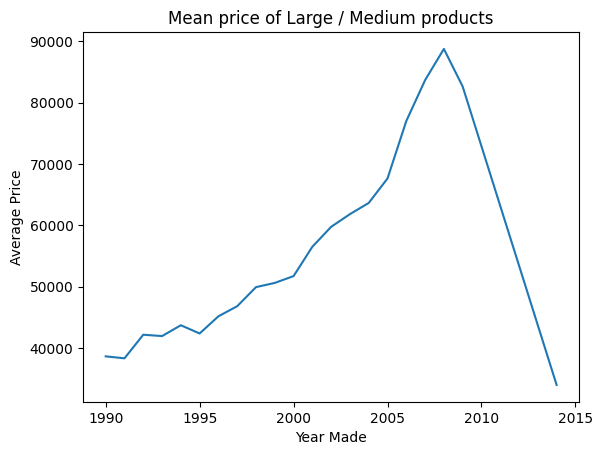

In [15]:
a = d[d.YearMade >= 1990].groupby("YearMade").mean()
a["SalePrice"].plot(kind = "line")
plt.title("Mean price of Large / Medium products")
plt.xlabel("Year Made")
plt.ylabel("Average Price")
plt.show()

Text(0, 0.5, 'Average Price')

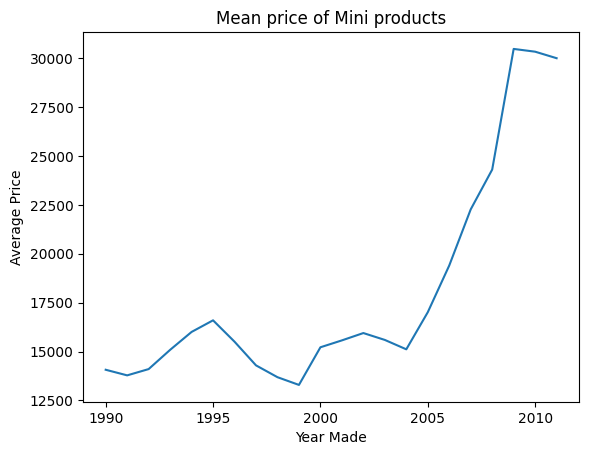

In [17]:
c = data[data.ProductSize == "Mini"]
b = c[c.YearMade >= 1990].groupby("YearMade").mean()
b["SalePrice"].plot(kind = "line")
plt.title("Mean price of Mini products")
plt.xlabel("Year Made")
plt.ylabel("Average Price")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96cf5f10-502f-492e-9f46-36bdb4751390' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>